<a href="https://colab.research.google.com/github/kspohn903/MegaMillions_ML_RidgeRegression_Predictor/blob/main/PowerBall_ExtractionAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#PACKAGE IMPORTS/DOWNLOADS/FETCH COMMANDS FOR ENVIRONMENT 

# !pip install -q timestring 
# !pip install -q datetime 
# !pip install -q data
# !pip install -q api-client # Alternate data collection protocols... 
# !pip install -q requests_html # Web scraper packages
# !pip install -q bs4 # unneeded if you have a source of api/ data to feed in... else web scrape.
# !pip install -q urllib3 # making sure that OSI L6 stuff can read in surface html and parse web documentation/ documents
# !pip install -q nltk # data processing, sentiment analysis 
# !pip install -q pandas # data frames, reading in data, blah...
# !pip install -q numpy # same as scipy. Manipulating tensor metrics, learning, adapting, etc.
# !pip install -q imgaug # Necessary if reading in specific google colab/ tensorflow,
# !pip install -q folium # usually used with image classifiers
# !pip install -q datascience # tensorflow of choice... manipulating for regressional analytics 
# !pip install -q scipy
# # !pip install -q google-cloud 
# !pip install -q rauth
# !pip install -q tensorflow
# !pip install statistics

# # !pip install --upgrade numpy # Alternative Updater to numpy... 
# If not Tensorflow or conflicts in package resolution, then this one...

# ARE YOU ON THE TRAIN??? ... THEN GET ON THE TRAIN!!! Edwarrrrrd!!!! 
# File reading likeness... as STRING_IO.(parserToken)

# from google.colab import drive, files, auth
# drive.mount('/content/drive', force_remount=True) # mounted / forcibly-remounted


In [ ]:
import pandas as pd, numpy as np, sys 
# # dateutil, secrets act as secondary date parser iff datetime fails or threadback issues of parsing dates...
# # optional args/ imports: ----------------------------------------------------
# import dateutil, secrets, bs4 as soup, urllib3, gzip, tenacity 
#-------------------------------------------------------------------------------
import json, requests, csv, traceback as tb, seaborn as sns, scipy as sci
import matplotlib.pyplot as plt, math, gzip, os, io, re, matplotlib.pylab as pl 
import matplotlib.transforms as mt, datetime, time, gc

# from apiclient import (APIClient, paginated, exceptions, retry_request,
#                HeaderAuthentication, JsonResponseHandler, JsonRequestFormatter, endpoint) 

from datetime import timedelta # any other methods...
# from apiclient.retrying import retry_if_api_request_error
from matplotlib.transforms import offset_copy 
from google.colab import files # Stealing/ Uploading/ Downloading to RAM files from my drive... 
from io import StringIO

# # File reading, analytics, dataframe manipulation en masse, datetime checks, garbage thread collection RAM/ NVRAM
# # Regex checking, files collected (requests/ urllib3), sys for filepath oauth checks... file dumps/reading

# # error thread checking, graphical displays, data analytics, plotting s***, you know
# # Everything here is super kosher... 
# from bs4 import BeautifulSoup as bs
import statistics
from matplotlib.font_manager import FontProperties


In [ ]:
# Derive_API_JSON_FROM_RAPIDAPI_REQUESTS.py
# Acts both as driver AND constructor ...  
try:
    # Derive PowerBall Numerical String Data of Winners from 
    
    today = datetime.datetime.now() # Current day: e.g. (MM-DD-YYYY = 06-11-2021)
    endMsg = input("What day are you asking to go up to? (e.g. 02/19/2021); Format: MM/DD/YYYY ")
    endInput = [int(el) for el in endMsg.split("/")]
    endYr = endInput[2]
    while ( endInput[0] not in [i for i in range(1,13,1)]) or (
            endInput[1] not in [i for i in range(1,32,1)]) or ( 
            endInput[2] not in [yr for yr in range(endYr, today.year + 1, 1)]) or (
            re.match("/[(\d{1-2})(-/)(\d{1-2})(-/)(\d{2,4})]/g", endMsg) ):
          endMsg = input("What day are you starting? (e.g. 1/1/2020, 10/7/2015); Format: MM/DD/YYYY ")
          endInput = [int(el) for el in endMsg.split("/")]
    
    endYr = endInput[2]
    endDay = datetime.datetime(year = endInput[2], month = endInput[0], day = endInput[1])
    print(f"endDay is {endDay}\n")
    print(f"Intended last day for PowerBall is {endMsg}, and endYear is {endYr}...\n")      
    
    beginMsg = input("What day are you starting? (e.g. 1/1/2020, 10/7/2015); Format: MM/DD/YYYY ")
    beginInput = [int(el) for el in beginMsg.split("/")]
    beginYr = beginInput[2]
    
    while beginInput not in [[10,7,2015], [1,2,2016], [1,4,2017], [1,3,2018], [1,2,2019], [1,1,2020], [1,2,2021], [1,1,2022]] or ( 
          beginInput[0] not in [i for i in range(1,13,1)]) or (
          beginInput[1] not in [i for i in range(1,32,1)]) or ( 
          beginInput[2] not in [yr for yr in range(beginYr, today.year + 1, 1)]) or (
          re.match("/[(\d{1-2})(-/)(\d{1-2})(-/)(\d{2-4})]/g", beginMsg) ):
          
          beginMsg = input("What day are you starting? (e.g. 1/1/2020, 10/7/2015); Format: MM/DD/YYYY ")
          beginInput = [int(el) for el in beginMsg.split("/")] 
          beginYr = int(beginInput[2])
    
    beginYr = int(beginInput[2])
    firstDay = datetime.datetime(year = beginInput[2], month = beginInput[0], day = beginInput[1])
    print(f"firstDay is {firstDay}\n")
    
    fDayString = firstDay.strftime("%m %d %Y")
    fDayString = fDayString.replace(" ","_")
    
    endString = endDay.strftime("%m %d %Y")
    endString = endString.replace(" ", "_")
    
    print(f"fDayString: {fDayString}\nendString: {endString}\n")
    
    # Modify to closest Tuesday/Thursday, based on bi-weekly draws approx. Midnight that day...
    yearA = firstDay.year # MM/DD/YYYY
    print(f"yearA is {yearA}\n")

    # !!!! ASSUMING U KNOW NEW LINES OF DATA FOR POWERBALL WINS, then append ---
    # --------------------------------------------------------------------------
    # Read in excel file "/content/drive/MyDrive/CSV_Files/PowerBall/{PowerBall_Schema.xlsx}"
    # Append newest Number Ball Set Scraped from website
    # ----------------------- IMPORTS AND FILE READING -------------------------
    
    # from openpyxl import Workbook, load_workbook
    # superDirName = "/content/drive/MyDrive/CSV_Files/PowerBall/"
    # gameType = "PowerBall" # ["PowerBall", "Mega Millions", ...]
    # schemaXLSX_FileName = "{}{}_Schema.xlsx".format(superDirName, gameType)
    # wb = load_workbook(schemaXLSX_FileName)
    # chosenWS = wb[beginYr] # schema oriented with beginYr...
    # missedValues = pd.read_csv("{}_Whatd_I_Miss_as_of_{}.csv".format(gameType,endString),header=0)
    # header = list(missedValues.columns.values)[1:-2]
    # print(f"header = {header}\n") 
    # for row in newPowerBall_Rows:
    #     for i in range(1,len(missedValues[header[0]].values)+1, 1):
    #         [Ball1,Ball2,Ball3,Ball4,Ball5, powerBall, mult] = [missedValues[header[k]].values for k in range(0, len(header), 1)]         
    #         chosenWS.append(f"{Ball1}",f"{Ball2}",f"{Ball3}",f"{Ball4}",f"{Ball5}", f"{powerBall}",f"{mult}", 
    #                         f"{Ball1} {Ball2} {Ball3} {Ball4} {Ball5} {powerBall} {mult}x")
    # print(f"Before saving, workbook as {schemaXLSX_FileName}, attempting to save current worksheet, {beginYr}, as a csv file... {superDirName}{gameType}_{yearA}_as_of_{endString}.xlsx")
    # with open(f"{superDirName}{gameType}_{yearA}_as_of_{endString}.xlsx.csv", 'w+', newline="") as schemaFile:  # for python 3
    # c = csv.writer(schemaFile)
    # for r in chosenWS.rows:
    #     c.writerow([cell.value for cell in r])
    # c.close()
    # wb.save(schemaXLSX_FileName)
    # """ 
    # Oct 7,2015; 2020 data is the 1st entry of the corresponding year excluding 2015 
    # in the above format... For obvious reasons.
    # Beyond this starting point back, number winning schemas are inconsistent and 
    # remain pairwise within certain time periods/ intervals 
    # """  
    
    superDirName = 'drive/MyDrive/CSV_Files/PowerBall/'
    filePathName = '{}PowerBall_Schema_{}_as_of_{}.csv'.format(superDirName,yearA,endString) 
    
    #  print(f"Before reading in from file path, \ 
    #  Steve-Bot is testing file read in from os, and validity of dataframe...\n")
    
    dfPowerBall = pd.read_csv(filePathName,header=0)
    print("dfPowerBall is successfully being read in...\n")
    
    print("---------- The column headers ------------\n")
    headerColumns = list(dfPowerBall.columns.values)
    print(f"Header Columns: {headerColumns}\n")

    drawingDate = dfPowerBall[headerColumns[0]].values
    firstNum = dfPowerBall[headerColumns[1]].values
    secondNum = dfPowerBall[headerColumns[2]].values
    thirdNum = dfPowerBall[headerColumns[3]].values
    fourthNum = dfPowerBall[headerColumns[4]].values
    fifthNum = dfPowerBall[headerColumns[5]].values
    powerBall = dfPowerBall[headerColumns[6]].values
    megaplier = dfPowerBall[headerColumns[7]].values
    jackpot = dfPowerBall[headerColumns[-1]].values

    lenCheck = [len(drawingDate) == el for el in [len(firstNum), len(secondNum), 
                                                 len(thirdNum), len(fourthNum), 
                                                 len(fifthNum), len(powerBall), len(jackpot)] ]

    # print(f"arrLenCheck:{lenCheck}, allSameSizeVectors: {False not in lenCheck}\n")
    #  data = [drawingDate,firstNumber, secondNumber, thirdNumber, 
    #          fourthNumber, fifthNumber, powerBalll, megaplier ]

    megaHeadersJSON = [ "First_Number", "Second_Number", "Third_Number", 
                        "Fourth_Number", "Fifth_Number", "PowerBall", "Megaplier", "Jackpot" ]
    
    #  print(f"DrawingDate:\n{drawingDate}\nFirstNumber:\n{firstNum}\n")
    #  print(f"SecondNumber:\n{secondNum}\nThirdNumber:\n{thirdNum}\n")
    #  print(f"FourthNumber:\n{fourthNum}\nFifthNumber:\n{fifthNum}\n")
    #  print(f"PowerBall:\n{powerBall}\nMegaplier:\n{megaplier}\nJackpot:\n{jackpot}\n")
    currentJackPot = jackpot[-1]
    print(f"currJackPot: {currentJackPot}\n")
    
    jsonFreq = { # By definition first 5 1-69, last one 1-26 
    1 : {"{}".format(i): 0 for i in range(1,70,1)}, # 1-69; Ball 1 # Heh... Nice
    2 : {"{}".format(i): 0 for i in range(1,70,1)}, # 1-69; Ball 2
    3 : {"{}".format(i): 0 for i in range(1,70,1)},  # 1-69; Ball 3 
    4 : {"{}".format(i): 0 for i in range(1,70,1)},  # 1-69; Ball 4                                          
    5 : {"{}".format(i): 0 for i in range(1,70,1)}, # 1-69; Ball 5
    6 : {"{}".format(i): 0 for i in range(1,27,1)}, # 1-26; PowerBall 
    } # append all elements into each respective json
   
    print(f"Before populating by frequencies:\n{jsonFreq}\n")
    for i in range(0, len(firstNum), 1): #dnc about the megaplier
        jsonFreq[1]["{}".format(firstNum[i])] += 1
        jsonFreq[2]["{}".format(secondNum[i])] += 1      
        jsonFreq[3]["{}".format(thirdNum[i])] += 1
        jsonFreq[4]["{}".format(fourthNum[i])] += 1
        jsonFreq[5]["{}".format(fifthNum[i])] += 1
        jsonFreq[6]["{}".format(powerBall[i])] += 1
        
        #  print(f"Populating Frequency Iteration no. {i+1}: (")
        #  print(f"json1={jsonFreq[1]},json2={jsonFreq[2]},json3={jsonFreq[3]}", end=',') 
        # print(f"json4={jsonFreq[4]}, json5={jsonFreq[5]}, json6={jsonFreq[6]})", end = "\n")
    print(f"After: {jsonFreq}\n")
    
    #  t1, t2, t3, t4, t5, t6 = 0, 0, 0, 0, 0, 0
    k1 = list(jsonFreq[1].keys())
    k2 = list(jsonFreq[2].keys())
    k3 = list(jsonFreq[3].keys())
    k4 = list(jsonFreq[4].keys())
    k5 = list(jsonFreq[5].keys())
    k6 = list(jsonFreq[6].keys())
    #  print(f"k1: {k1}\nk2: {k2}\nk3: {k3}\nk4: {k4}\nk5: {k5}\nk6: {k6}\n")
   
    v1 = list(jsonFreq[1].values()) # Frequencies of 1-70 for Nums. 1-5
    v2 = list(jsonFreq[2].values())
    v3 = list(jsonFreq[3].values())
    v4 = list(jsonFreq[4].values()) 
    v5 = list(jsonFreq[5].values())
    v6 = list(jsonFreq[6].values()) # powerBall Frequencies 1-25 
    #  print(f"v1: {v1}\nv2: {v2}\nv3: {v3}\nv4: {v4}\nv5: {v5}\nv6: {v6}\n")
   
    vTot = [int(el) for el in v1]
    t1, t2, t3, t4, t5, t6 = 0, 0, 0, 0, 0, 0
    for i in range(0,len(v1), 1):
        e1 = int(vTot[i])
        e2 = int(v2[i])
        e3 = int(v3[i])
        e4 = int(v4[i])
        e5 = int(v5[i])
        #  print(f"(e1={e1}, e2={e2}, e3={e3}, e4={e4}, e5={e5})\n")
        sumFreq = int (e2+e3+e4+e5)
        #  print(f"Prior to appending sumFreq: (lTot: {int(vTot[i])}, sumFreq:{sumFreq})\n")
        t1 += int(v1[i])
        t2 += int(v2[i])
        t3 += int(v3[i])
        t4 += int(v4[i])
        t5 += int(v5[i])
        vTot[i] += int(sumFreq)
        #  print(f"Total Frequency for Digit No.{i+1} (for Balls 1-5), is {int(vTot[i])}.\n")
        #  print(f"Stats for iteration No. = {i+1}: (t1={t1}, t2={t2}, t3={t3}, t4={t4}, t5={t5})\n")
    
    print(f"Final Stats: (t1:{t1}, t2:{t2}, t3:{t3}, t4:{t4}, t5:{t5})\n")
    print(f"After total appendation, vTot: {vTot}\n")
   
    maxNoDraws = t1
    #  print(f"maxNoDraws: {maxNoDraws}\n")
   
    jsonFreq[7] = {"{}".format(i+1): int(vTot[i]) for i in range(0,len(vTot),1)}
    print(f"Checking jsonFreq[7] patch: {jsonFreq[7]}\n")
    df_1_5 = pd.DataFrame(data={ "First_Number": jsonFreq[1], 
                                 "Second_Number": jsonFreq[2],
                                 "Third_Number": jsonFreq[3],
                                 "Fourth_Number": jsonFreq[4],
                                 "Fifth_Number": jsonFreq[5],
                                 "Total": jsonFreq[7] 
                               } )
    #  # weighted stat. avg. of total draws, i.e. max. no draws from dt A to dt B (today).
    df_1_5["Prob_Ball1"] = round(df_1_5["First_Number"]/maxNoDraws, 6) 
    df_1_5["Prob_Ball2"] = round(df_1_5["Second_Number"]/maxNoDraws, 6)
    df_1_5["Prob_Ball3"] = round(df_1_5["Third_Number"]/maxNoDraws, 6)
    df_1_5["Prob_Ball4"] = round(df_1_5["Fourth_Number"]/maxNoDraws, 6)
    df_1_5["Prob_Ball5"] = round(df_1_5["Fifth_Number"]/maxNoDraws, 6)
    df_1_5["Prob_Total"] = round(df_1_5["Total"]/maxNoDraws, 6)

    df_1_5.sort_values(by=['Prob_Total','Total'], inplace=True, ascending=False)
    #  print(f"{df_1_5['Prob_Total']}\n{df_1_5['Prob_Ball1']}\n{df_1_5['Prob_Ball2']}\n{df_1_5['Prob_Ball3']}\n{df_1_5['Prob_Ball4']}\n{df_1_5['Prob_Ball5']}\n")
    
    b_1_5_stats = {}
    b_1_5 =  [firstNum, secondNum, thirdNum, fourthNum, fifthNum, df_1_5["Total"].values,
              df_1_5["Prob_Ball1"].values, df_1_5["Prob_Ball2"].values, df_1_5["Prob_Ball3"].values,
              df_1_5["Prob_Ball4"].values, df_1_5["Prob_Ball5"].values, df_1_5["Prob_Total"].values ]
    ballNames = ["Ball_1", "Ball_2", "Ball_3", "Ball_4", "Ball_5", "Ball_Total", 
                 "Prob_Ball1", "Prob_Ball2", "Prob_Ball3","Prob_Ball4", "Prob_Ball5", "Prob_Total"]
    for i in range(0,len(b_1_5), 1):
        ball = b_1_5[i]
        b_1_5_stats[f"{ballNames[i]}"] = {
                              "Mean": np.mean(ball),
                              "Standard Deviation": np.std(ball),
                              "Variance": np.var(ball),
                              "Median": np.median(ball),
                               # "Mode": statistics.multimode(ball),
                              "Minimum": np.min(ball),
                              "Maximum": np.max(ball),
                              "Sample Variance": (np.var(ball)*(ball.size/((ball.size - 1)*1.0))),
                              "Sample Skewness": (sci.stats.skew(ball)),
                              "Sample Fisher Kurtosis": (sci.stats.kurtosis(ball)), # fisher = True
                              "Sample Kurtosis Bias Normalized": (sci.stats.kurtosis(ball, fisher=False)), # Fisher = False        
    }
    df_b1_5_Stats_to_Date = pd.DataFrame(data=b_1_5_stats)
    df_b1_5_Stats_to_Date.head()
    df_b1_5_Stats_to_Date.to_csv(f"{superDirName}Proper_PowerBall_Ball5_Stats_{yearA}_as_of_{endString}.csv", index = True)     
    
    df_6 = pd.DataFrame(data={"PowerBall": jsonFreq[6] })
    df_6["Prob_PowerBall"] = round(df_6["PowerBall"]/maxNoDraws, 6)
    df_6.sort_values(by=['Prob_PowerBall','PowerBall'], inplace=True, ascending=False)
    #  print(f"df_1_5:\n{df_1_5}\ndf_6:\n{df_6}\nProb_Total:\n{df_1_5['Prob_Total']}\n")

    pb_stats = {}
    pbHeader = ["PowerBall", "Prob_PowerBall"]
    pb = [powerBall, df_6["Prob_PowerBall"].values]
    
    for i in range(0,len(pbHeader),1):
        pB = pb[i]
        pb_stats[f"{pbHeader[i]}"] = {
                              "Mean_PowerBall": np.mean(pB),
                              "Standard Deviation": np.std(pB),
                              "Variance": np.var(pB),
                              "Median": np.median(pB),
                              # "Mode": statistics.multimode(pB),
                              "Minimum": np.min(pB),
                              "Maximum": np.max(pB),
                              "Sample Variance": (np.var(pB)* (pB.size/((pB.size - 1)*1.0))),
                              "Sample Skewness": (sci.stats.skew(pB)),
                              "Sample Fisher Kurtosis": (sci.stats.kurtosis(pB)), # fisher = True
                              "Sample Kurtosis Bias Normalized": (sci.stats.kurtosis(pB, fisher=False)), # fisher = False        
        }
    
    df_mb_Stats_to_Date = pd.DataFrame(data=pb_stats)
    df_mb_Stats_to_Date.head()
    df_mb_Stats_to_Date.to_csv(f"{superDirName}Proper_PowerBall_PowerBall_Stats_{yearA}_as_of_{endString}.csv", index = True)  
    
    df_1_5.to_csv('{}PowerBall_Ball5_Stats_{}_as_of_{}.csv'.format(superDirName, yearA, endString), index = True) # yearNo: e.g. {2020,2021}, v. overall
    df_6.to_csv('{}PowerBall_PowerBall_Stats_{}_as_of_{}.csv'.format(superDirName, yearA, endString), index=True)
    print(f"dataframes have been saved to misc. csv files...\n For later extraction, analytics, and likelihood estimators...\nShutting down...\n")

except IOError: 
       print(f"Failure to properly close/read file (IO). Please check stack trace and try again.\n")
       tb.print_exc()
except EOFError:
       print(f"Failure to properly read/parse file properly or has reached EOF.Please check stack trace and try again.\n")
       tb.print_exc()
except IndentationError: 
       print(f"Failure to properly indent. Please check stack trace and try again.\n")
       tb.print_exc()
except ImportError: 
       print(f"Import has failed. Please check imports and try again.\n")
       tb.print_exc()
except Exception: 
       print(f"General Exception has occurred. Please check stack trace and try again.\n")
       tb.print_exc()
except: 
       print(f"General Error has occurred. Please check stack trace and try again.\n")
       tb.print_exc()          

What day are you asking to go up to? (e.g. 02/19/2021); Format: MM/DD/YYYY 03/03/2022
endDay is 2022-03-03 00:00:00

Intended last day for PowerBall is 03/03/2022, and endYear is 2022...

What day are you starting? (e.g. 1/1/2020, 10/7/2015); Format: MM/DD/YYYY 10/7/2015
firstDay is 2015-10-07 00:00:00

fDayString: 10_07_2015
endString: 03_03_2022

yearA is 2015

dfPowerBall is successfully being read in...

---------- The column headers ------------

Header Columns: ['DrawingDate', 'FirstNumber', 'SecondNumber', 'ThirdNumber', 'FourthNumber', 'FifthNumber', 'PowerBall', 'Megaplier', 'NumberSet', 'Jackpot']

currJackPot: 64900000

Before populating by frequencies:
{1: {'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0, '11': 0, '12': 0, '13': 0, '14': 0, '15': 0, '16': 0, '17': 0, '18': 0, '19': 0, '20': 0, '21': 0, '22': 0, '23': 0, '24': 0, '25': 0, '26': 0, '27': 0, '28': 0, '29': 0, '30': 0, '31': 0, '32': 0, '33': 0, '34': 0, '35': 0, '36': 0, '37': 0

The Header Columns Ball5: ['Unnamed: 0' 'First_Number' 'Second_Number' 'Third_Number'
 'Fourth_Number' 'Fifth_Number' 'Total' 'Prob_Ball1' 'Prob_Ball2'
 'Prob_Ball3' 'Prob_Ball4' 'Prob_Ball5' 'Prob_Total']

The Header Columns powerBall: ['Unnamed: 0' 'PowerBall' 'Prob_PowerBall']



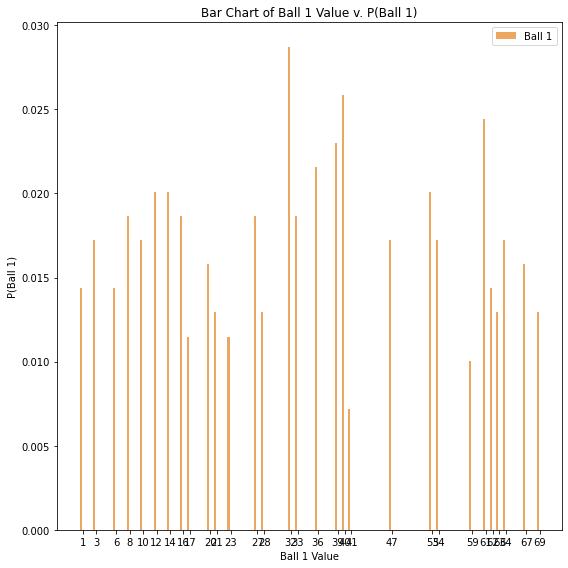

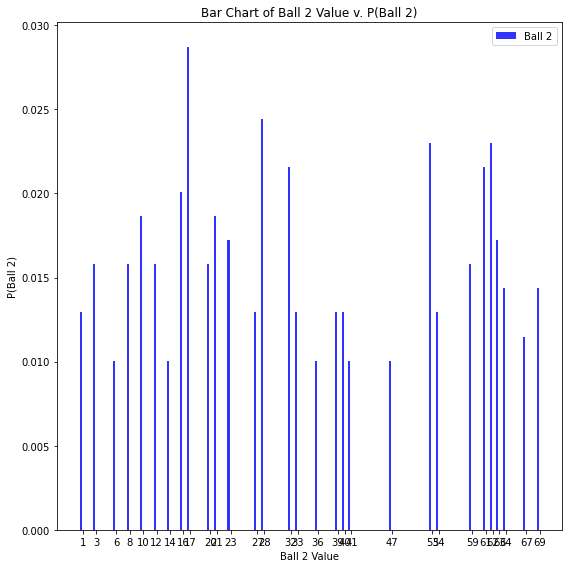

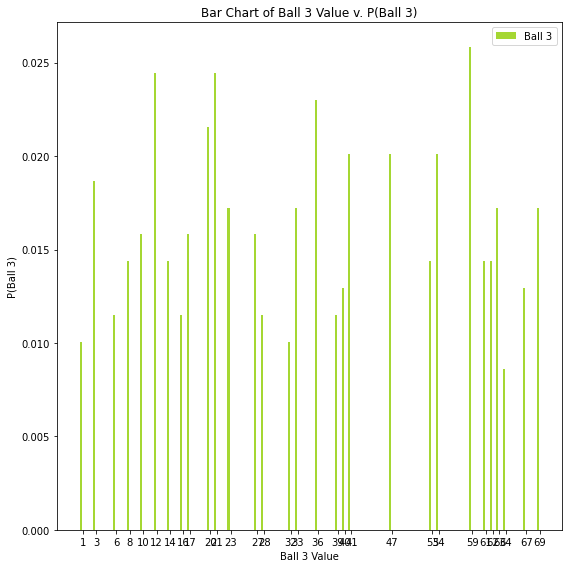

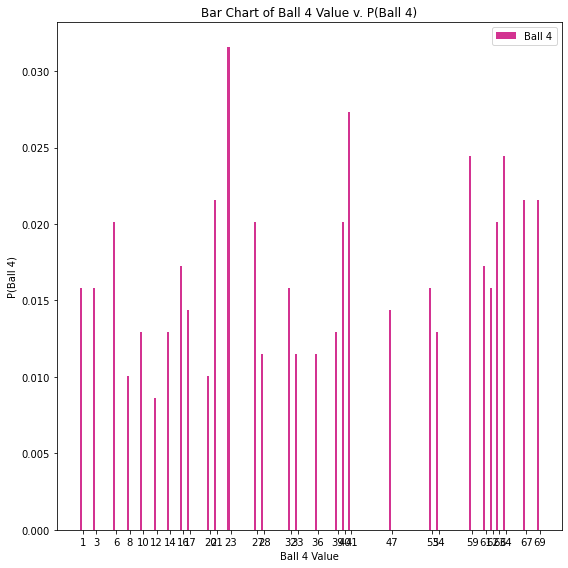

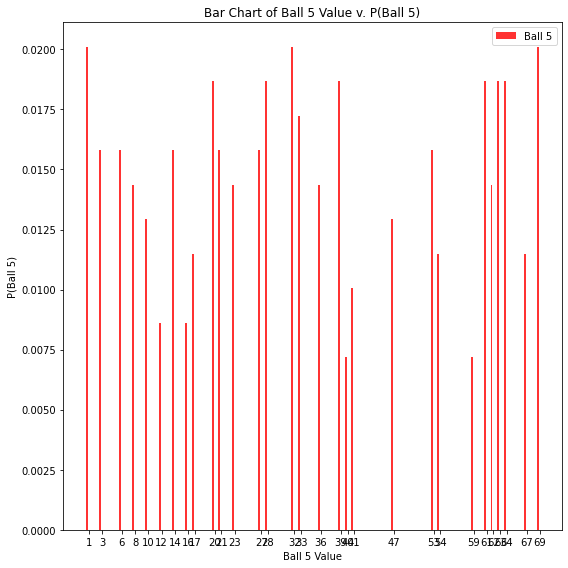

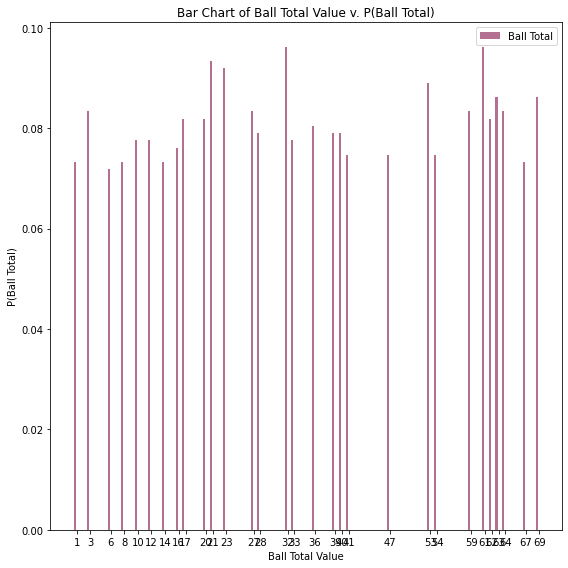

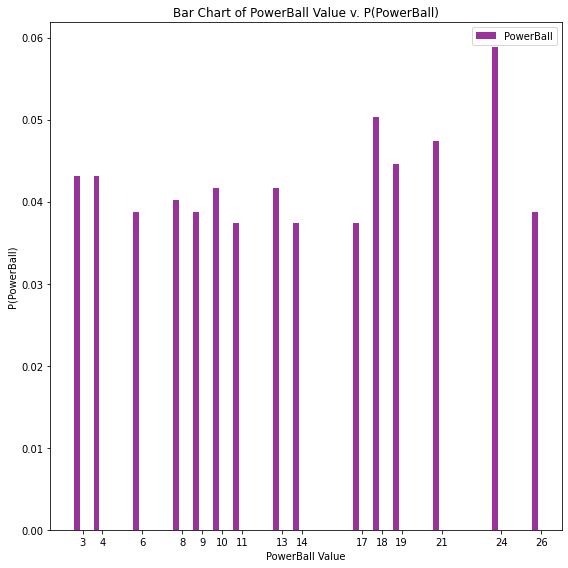

In [ ]:
# Prev. File Name: POWERBALL_Stat_Pictographic.py
# split dataset in train and testing set   
import matplotlib.pyplot as plt
try: 
    #yearA, beginMsg/todayStr ... No longer needed... Input already validated.
    
    filePathName1 = '{}PowerBall_Ball5_Stats_{}_as_of_{}.csv'.format(superDirName, yearA, endString)
    filePathName2 = '{}PowerBall_PowerBall_Stats_{}_as_of_{}.csv'.format(superDirName, yearA, endString)
    # print(f"Before reading in from file path, Steve-Bot is testing file read in from os, and validity of dataframe...\n")
    
    dfPowerBall_Ball5 = pd.read_csv(filePathName1, header=0, nrows=30) # 
    # print("dfPowerBall_Ball5 is successfully being read in...\n")
    
    headerColumnsBall5 = dfPowerBall_Ball5.columns.values
    print(f"The Header Columns Ball5: {headerColumnsBall5}\n")
    
    datasetBall5 = dfPowerBall_Ball5.values
    dfPowerBall_PowerBall = pd.read_csv(filePathName2,header=0,nrows=15) 
    datasetMB = dfPowerBall_PowerBall.values
    # print("dfPowerBall_PowerBall is successfully being read in...\n")
    
    headerColumnsPowerBall = dfPowerBall_PowerBall.columns.values
    print(f"The Header Columns powerBall: {headerColumnsPowerBall}\n")
    
    # Values 5 Ball, powerBall: headerColumnsPowerBall[0], headerColumnsBall5[0]
    # 5 Ball: [Value, First_Number, Second_Number, Third_Number, Fourth_Number, Fifth_Number, Total,
    # Prob_Ball1, Prob_Ball2, Prob_Ball3, Prob_Ball4, Prob_Ball5, Prob_Total]
    # Mega Ball: [Ball Value, Freq_Mega_Ball, Prob_Mega_Ball]
    
    # Assuming values in numB5, numMB are dependent on probability of regressional predictions...
    # Where the probability of a number is treated as independent, non-categorical
    
    xB5 = dfPowerBall_Ball5[headerColumnsBall5[0]] # Ball Value for B5
    xPB = dfPowerBall_PowerBall[headerColumnsPowerBall[0]] # Ball Value for MB
    # print(f"(xB5: {xB5.values}\nxPB: {xPB.values})\n")
    
    yB1 = dfPowerBall_Ball5[headerColumnsBall5[-6]] # Prob_Ball1 Column Data
    yB2 = dfPowerBall_Ball5[headerColumnsBall5[-5]] # Prob_Ball2 ...
    yB3 = dfPowerBall_Ball5[headerColumnsBall5[-4]] # Prob_Ball3 ...
    yB4 = dfPowerBall_Ball5[headerColumnsBall5[-3]] # Prob_Ball4 ...
    yB5 = dfPowerBall_Ball5[headerColumnsBall5[-2]] # Prob_Ball5 ...
    yBTot = dfPowerBall_Ball5[headerColumnsBall5[-1]] # Prob_Total ...
    
    # yB = [yB1, yB2, yB3, yB4, yB5, yBTot]
    # Prob Ball_5: {Prob_Ball{i+1}, Prob_Total}
    
    yPB = dfPowerBall_PowerBall[headerColumnsPowerBall[2]]
    # print(f"(yB1:{yB1.values}\nyB2:{yB2.values}\nyB3:{yB3.values}\nyB4:{yB4.values}\nyB5:{yB5.values}\nyBTot:{yBTot.values})\n")
  
    nSubgroupsBall5, nBall5, totNoEl = 70, 5, 6
    bar_width, opacity = 0.30, 0.80

    # Super Bar Chart of plots B1-B5, Ball Total
    rows, cols = 2,3
    colors = ['#e69138',"blue",'#8fce00','#c90076','red','#A14C75' ]
    label = ["Ball 1", "Ball 2", "Ball 3", "Ball 4", "Ball 5", "Ball Total"]
    yLabel = ["P(Ball 1)", "P(Ball 2)", "P(Ball 3)", "P(Ball 4)", "P(Ball 5)", "P(Ball Total)"]
    # weird-orange,blue, lime-green, hard-magenta, red, velvet/ salmon-pink
    
    yBall5_JSON = { 1: yB1, 2: yB2, 3: yB3, 4:yB4, 5:yB5, 6:yBTot }
    for r in range(0, rows, 1):
        for c in range(0, cols, 1):
             fig1, ax1 = plt.subplots(figsize=(8,8))
             count = 3*r+c
             bChartB5 = plt.bar(xB5, yBall5_JSON[count+1], bar_width, alpha=opacity, color=colors[count], label=f"{label[count]}")
             plt.xlabel(f"{label[count]} Value")
             plt.ylabel(yLabel[count])
             plt.title('Bar Chart of {} Value v. {}'.format(label[count], yLabel[count]) )
             # print(f"Testing if tuple arr concatonator works for str bar chart grouped by stat frequency ***BEFORE***...\n")
             plt.xticks(xB5 + bar_width, tuple([str(ball) for ball in xB5]) )
             # print(f"Testing if tuple arr concatonator works for str bar chart grouped by stat frequency ***AFTER***...\n")
             plt.legend()
             plt.tight_layout()
             plt.savefig('{}PowerBall_{}_BarChartPlot_{}_{}.png'.format(superDirName,
                 label[count], yearA, datetime.datetime.now().strftime("%Y %m %d").replace(" ","-") ) )
             plt.show()
   
    fig2, ax2 = plt.subplots(figsize=(8,8))
    bChartMB = plt.bar(xPB, yPB, bar_width, alpha=opacity, color='purple', label='PowerBall')
    plt.xlabel('PowerBall Value')
    plt.ylabel('P(PowerBall)')
    plt.title('Bar Chart of PowerBall Value v. P(PowerBall)')
    # print(f"Testing if tuple arr concatonator works for str bar chart grouped by stat frequency ***BEFORE***...\n")
    plt.xticks(xPB + bar_width, tuple([str(ball) for ball in xPB]) )
    # print(f"Testing if tuple arr concatonator works for str bar chart grouped by stat frequency ***AFTER***...\n")
    plt.legend()
    plt.tight_layout()
    plt.savefig('{}PowerBall_PowerBall_BarChartPlot_{}_{}.png'.format(
        superDirName, yearA, datetime.datetime.now().strftime("%Y %m %d").replace(" ","-") ) )
    plt.show()
    
    # regB1=LinearRegression()  
    # regB1.fit(numB5,p1B5)  
    # y_pre = reg.predict(X_test) 

    ### Intended for Regression _Prediction, either RidgeRegression using lineardense 
        # as matrix fodder data, and trainsets for linear predictors,
        # based on KNN's, but I'm not skilled enough to use a KNN of that 
        # regression predictor form... Not competent enough, yet.  

except IOError: 
       print(f"Failure to properly close/read file (IO). Please check stack trace and try again.\n")
       tb.print_exc()
except EOFError:
       print(f"Failure to properly read/parse file properly or has reached EOF.Please check stack trace and try again.\n")
       tb.print_exc()
except IndentationError: 
       print(f"Failure to properly indent. Please check stack trace and try again.\n")
       tb.print_exc()
except ImportError: 
       print(f"Import has failed. Please check imports and try again.\n")
       tb.print_exc()
except Exception: 
       print(f"General Exception has occurred. Please check stack trace and try again.\n")
       tb.print_exc()
except: 
       print(f"General Error has occurred. Please check stack trace and try again.\n")
       tb.print_exc()


In [ ]:
# Create ALL POWER BALL
superPB_DirName = "/content/drive/MyDrive/CSV_Files/PowerBall/"
B5_FilePath = "{}PowerBall_Ball5_Stats_{}_as_of_{}.csv".format(superPB_DirName,yearA, endString) 
PB_FilePath = "{}PowerBall_PowerBall_Stats_{}_as_of_{}.csv".format(superPB_DirName,yearA, endString)                                                                                                                                                   
# todayFileStr = datetime.datetime.today().strftime("%m %d %Y").replace(" ","_")    
# print(f"Before reading in from file path, Steve-Bot is testing file read in from os, and validity of dataframe...\n")
print(f"FilePaths: \nB5: {B5_FilePath}\nPB: {PB_FilePath}\n")

try:
    print("Hello. I am Baymax...\n")
    pb_b5 = pd.read_csv(B5_FilePath, header=0)
    # print("Dataframe B5 read in ...\n")
    
    # print("---------- The column headers ------------\n")
    headerColumns = list(pb_b5.columns.values)
    print(f"Header Columns: {headerColumns}\n")
    
    numName_b5 = headerColumns[0]
    # print(f"numName_b5: {numName_b5}") 
    
    pb_b5_values = [ el for el in pb_b5[numName_b5].values]
    # print(f"values Before Filter: {pb_b5_values}")

    pb_b5_values = pb_b5_values[0:60] # all b5 elements; assuming other 10-19 balls are cold numbers ... 
    # print(f"b5 Values After Filter: {pb_b5_values}\nb5_len: {len(pb_b5_values)}\n")
    
    pb_pb = pd.read_csv(PB_FilePath, header=0)
    # print("Dataframe MB read in ...\n")
    
    headerPB = list(pb_pb.columns.values)
    print(f"headerPB: {headerPB}")
    
    pb_numName = headerPB[0]
    # print(f"PB_NumName: {pb_numName}\n")
    
    pb_pb_values = [ el for el in pb_pb[pb_numName].values]
    # print(f"values Before Filter: {pb_pb_values}")
    
    pb_pb_values = pb_pb_values[0:15] # all mb elements; assuming other 10-19 balls are cold numbers ...  
    # print(f"pb Values After Filter: {pb_pb_values}\n\npb_len: {len(pb_pb_values)}\n")

    all_pb = open("{}All_PowerBall_Data_Scraped_{}_as_of_{}.csv".format(superPB_DirName, yearA, endString), mode="w+")
    print("I am a personal health robot. I can assist in all of your healthcare needs.")
    all_pb.write("Ball 1, Ball 2, Ball 3, Ball 4, Ball 5, PowerBall\n") # Write ur header ...
    
    powerBallNos = pb_pb[headerPB[0]].values
    probTotal_Vector = pb_b5["Prob_Total"].values
    probAvgTotal_Vector = [el/5 for el in probTotal_Vector]
    
    # print(f"probAvgTotal_Vector: {probAvgTotal_Vector}\n")
    probPB_Vector = pb_pb["Prob_PowerBall"].values

    t1, t2 = 0, 0
    # print(f"probTotal_Vector:\n {probTotal_Vector}\nprobPowerBall_Vector:\n {probPowerBall_Vector}\n") 
    for i in range(0,len(probTotal_Vector), 1):
        t1 += probTotal_Vector[i]    
    t1 /= 5
    for j in range(0, len(probPB_Vector), 1):
        t2 += probPB_Vector[j]
    
    print(f"[b5,powBall]: [{t1},{t2}]\n")  
    [pBall1_Vector, pBall2_Vector, pBall3_Vector, pBall4_Vector, pBall5_Vector, ball5Nos] = [
     pb_b5["Prob_Ball1"].values, pb_b5["Prob_Ball2"].values,
    pb_b5["Prob_Ball3"].values, pb_b5["Prob_Ball4"].values,
    pb_b5["Prob_Ball5"].values, pb_b5[headerPB[0]].values]
    
    p1,p2,p3,p4,p5 = 0,0,0,0,0
    for k in range(0,len(pBall1_Vector),1):
        p1 += pBall1_Vector[k]
        p2 += pBall2_Vector[k]
        p3 += pBall3_Vector[k]
        p4 += pBall4_Vector[k]
        p5 += pBall5_Vector[k]   

    powerBallNos = powerBallNos[0:15] # 15 power balls; ditch last 11 cold numbers
    ball5Nos = ball5Nos[0:60] # 6 * (noWheelStructsDesired=4; nWSD <= len(vector) && % 6 ==0) - 1
    # 50 Ball-5 Columns; ditch last 19 cold numbers 
    
    # print(f"The top 60 values for ball5Nos and top 15 powerBall Nums are ({ball5Nos}, {powerBallNos})\n")
    print(f"[len(ball5Nos),len(powerBallNos)] = [{len(ball5Nos)},{len(powerBallNos)}]\n")    
    
    # ball5Nos = sorted(ball5Nos)
    # powerBallNos = sorted(powerBallNos)
    # print(f"sorted BallNos= (ball5Nos,powerBallNos): ({ball5Nos, powerBallNos})\n")
    
    # print(f"pBall1: {pBall1_Vector}\npBall2: {pBall2_Vector}\npBall3: {pBall3_Vector}\npBall4: {pBall4_Vector}\npBall5: {pBall5_Vector}\n")
    # print(f"probTotal_Vector:\n {probTotal_Vector}\nprobPowerBall_Vector:\n {probPowerBall_Vector}\n") 
    
    print(f"Hot Numbers by 5 Ball/ PowerBall, respectively...\nBall5:\n{ball5Nos}\nPowerBall:\n{powerBallNos}\n")
    
    predicted_avg = (p1+p2+p3+p4+p5)/5
    print(f"[p1,p2,p3,p4,p5,predictedAvg]: [{p1}, {p2}, {p3}, {p4}, {p5}, {predicted_avg}]\n")
    
    # Missing probability of at most, +0.06937394247, throughout df[...]_Ball5
    # So, ~100% of all probabilities accounted for... Some lost in rounding, I guess
    # **gaining**, on avg., 0.018849e-2% per entry... 
    # Dunno if that's true or not, but I'll assume yes...

    chosenElements = [] # all b5 elements beyond the first must be distinct from b1 and each other
    # This statistically reduces the odds, and justifies that these types of games 
    # are a lie... Shitty carnival games with lying/cheating odds... 
    for i1,b1 in enumerate(pb_b5_values): # balls 1-5 in top 50 data values
        chosenElements = []
        # print(f"b1: {b1}\n")
        chosenElements.append(b1)
        # print(f"b1: chosenElements={chosenElements}\n")
        for i2,b2 in enumerate(pb_b5_values): # for all b5 elements, choose distinct numbers in 
            if b2 not in chosenElements: # choosing distinct b2 element
               chosenElements.append(b2)
               #  print(f"b2: {b2}\n")
               #  print(f"b2: chosenElements={chosenElements}\n")
            else: 
               continue # non-distinct element, so skip
            
            for i3,b3 in enumerate(pb_b5_values):
                if b3 not in chosenElements:
                   chosenElements.append(b3)
                   #  print(f"b3: {b3}\n")
                   #  print(f"b3: chosenElements={chosenElements}\n")
                else: # non-distinct element, so skip
                   continue 
                
                for i4,b4 in enumerate(pb_b5_values):
                    if b4 not in chosenElements:
                       chosenElements.append(b4)
                       # print(f"b4: {b4}\n")
                       # print(f"b4: chosenElements={chosenElements}\n")
                    else: 
                       continue # non-distinct element, so skip
                    
                    for i5,b5 in enumerate(pb_b5_values): # distinct b1,b2,b3,b4,b5 elements 
                        if b5 not in chosenElements:
                           chosenElements.append(b5)
                           # print(f"b5: chosenElements={chosenElements}\n")
                           # print(f"b5: {b5}\n")
                        else: 
                           continue # non-distinct element, so skip
                        
                        for i6, pB in enumerate(pb_pb_values): # pB in [1,26]
                            # print(f"(i1,i2,i3,i4,i5,i6): ({i1},{i2}, {i3}, {i4}, {i5}, {i6})\n")
                            # print(f"(b1,b2,b3,b4,b5,mB): ({b1},{b2}, {b3}, {b4}, {b5}, {pB})\n")
                            all_pb.write("{}, {}, {}, {}, {}, {}\n".format(b1,b2,b3,b4,b5,pB))
        # print(f"chosenElements={chosenElements}")  
    print("All possible PowerBall Data Values possible have been successfully written to file... Shutting down...!")
    all_pb.close()
except:
    print("An exception has occurred... Hm... Something doesn't seem right. Check the stack trace and try again...\n")
    tb.print_exc()
finally:
    print("Goodbye...\n")

FilePaths: 
B5: /content/drive/MyDrive/CSV_Files/PowerBall/PowerBall_Ball5_Stats_2015_as_of_03_03_2022.csv
PB: /content/drive/MyDrive/CSV_Files/PowerBall/PowerBall_PowerBall_Stats_2015_as_of_03_03_2022.csv

Hello. I am Baymax...

Header Columns: ['Unnamed: 0', 'First_Number', 'Second_Number', 'Third_Number', 'Fourth_Number', 'Fifth_Number', 'Total', 'Prob_Ball1', 'Prob_Ball2', 'Prob_Ball3', 'Prob_Ball4', 'Prob_Ball5', 'Prob_Total']

headerPB: ['Unnamed: 0', 'PowerBall', 'Prob_PowerBall']
I am a personal health robot. I can assist in all of your healthcare needs.
[b5,powBall]: [1.0000000000000004,0.9999999999999997]

[len(ball5Nos),len(powerBallNos)] = [60,15]

Hot Numbers by 5 Ball/ PowerBall, respectively...
Ball5:
[32 61 21 23 53 63 69  3 27 59 64 17 20 62 36 28 39 40 10 12 33 16 41 47
 54  1  8 14 67  6 15 22 29 38 44 45 50 52 56 57  2  5 37 68 18 30 42 48
  7 11 25 66 60 19 43 55 65  9 51  4]
PowerBall:
[24 18 21 19  3  4 10 13  8 26  6  9 11 14 17]

[p1,p2,p3,p4,p5,predictedAvg]: 

In [ ]:
# Previous Super File Name: POWERBALL_WHEEL_GENERATOR.ipynb
try:
    newSuperDir = '/content/drive/MyDrive/CSV_Files/PowerBall/'
    
    wheel_data_trainset_ABSPATHNAME= '{}POWERBALL_WHEEL_TRAINSET_{}_{}.csv'.format(
        newSuperDir,yearA,endString)
    wheel_data_trainset_ABSPATHNAME = open(wheel_data_trainset_ABSPATHNAME,mode="w+")
    all_powerBallDataFileName = '{}All_PowerBall_Data_Scraped_{}_as_of_{}.csv'.format(newSuperDir,yearA, endString)
    all_powerBallDataFile = pd.read_csv(all_powerBallDataFileName, header=0)
    # print(f"PowerBall DataFrame read in...\n")
    header = list(all_powerBallDataFile.columns.values)
    
    for i, el in enumerate(header):
        if i >= 0 and i < (len(header) - 1): # all beginning elements header written to file
           wheel_data_trainset_ABSPATHNAME.write(f"{header[i]},")
        else: #len-1 element last one written to header on file ...
           wheel_data_trainset_ABSPATHNAME.write(f"{header[i]}\n") 

    wheelSchema = { "Set 1": [ 1,2,3,4,5,6, 7,8,9,10,11,12],
                    "Set 2": [ 1,3,5,7,9,11, 2,4,6,8,10,12 ], 
                    "Set 3": [ 1,2,3,10,11,12, 4,5,6,7,8,9 ],  
                    "Set 4": [ 1,2,3,7,8,9, 4,5,6,10,11,12 ] }
       
    noWheelSets = int(len(wheelSchema))
    # print(f"noWheelSets: {noWheelSets}\n")
   
    #forcibly override memory pointer address for wheelSchema dictionary values, and make them each an index < 12; [0,...,11]   
    for i in range(1, noWheelSets + 1, 1):
        setNum = wheelSchema[f"Set {i}"]
        setNum = [(el-1) for el in setNum ] # end of setToIndexArr
        # print(f"Before attempting to mutate Set {i} in wheelSchema, setNum = {setNum}...\n")
        wheelSchema[f"Set {i}"] = setNum                  
    # print("After...{}".format(wheelSchema[f"Set {i}"] ) )  
    # print(f"{wheelSchema}\n")

    # for every 2 rows, read in as data 2b wheeled ...
    # dataframe is a wrapper to a json object... 
    numRows = len(all_powerBallDataFile[header[0] ] )
    numCols = len(header)
    # print(f"(numRows, numCols): ({numRows}, {numCols})\n")

    noIterations = 0
    for r in range(0, int(numRows/2) + 1, 1):    
        # columns 0-5 {Balls 1-4, PowerBall}, [0] ---------------------------
        wheelSet = []
        b1_1 = all_powerBallDataFile[header[0]].values[r]
        b2_1 = all_powerBallDataFile[header[1]].values[r]
        b3_1 = all_powerBallDataFile[header[2]].values[r]
        b4_1 = all_powerBallDataFile[header[3]].values[r]
        b5_1 = all_powerBallDataFile[header[4]].values[r]
        mB_1 = all_powerBallDataFile[header[5]].values[r]

        # columns 0-5 {Balls 1-4, PowerBall}, [1] ---------------------------
        b1_2 = all_powerBallDataFile[header[0]].values[r+1]
        b2_2 = all_powerBallDataFile[header[1]].values[r+1]
        b3_2 = all_powerBallDataFile[header[2]].values[r+1]
        b4_2 = all_powerBallDataFile[header[3]].values[r+1]
        b5_2 = all_powerBallDataFile[header[4]].values[r+1]
        mB_2 = all_powerBallDataFile[header[5]].values[r+1]
        wheelSet = [ b1_1, b2_1, b3_1, b4_1, b5_1, mB_1,
                     b1_2, b2_2, b3_2, b4_2, b5_2, mB_2 ] 
        print(f"WheelSet no.{noIterations+1}: {wheelSet}\n")
        for m in range(1, noWheelSets+1, 1): # 4*12 = 48 total computations internally
            # print(f"Set No. {m} ")
            setNo = wheelSchema["Set {}".format(m)]
            for j in range(0, int(len(setNo)/6), 1): # 2 total sets
                for k in range(0, int(len(wheelSet)/2), 1): # 6 elements per set
                    if (k+1) % 6 != 0: # If not powerBall/megaBall, then keep csv schema...
                       # Else, new line instead of csv's comma after line elements...
                       # Calculations exactly identical to both however 
                       #  print(f"Element no. {6*(j) + k + 1} = {wheelSet[setNo[6*j + k]]}")
                       wheel_data_trainset_ABSPATHNAME.write("{}, ".format(wheelSet[setNo[6*j+k]]))
                    else: 
                       mB = [mB_1,mB_2] # Mega Balls applicable
                       # print(f"Element no. {6*j+k+1} = {wheelSet[setNo[6*j + k]] if wheelSet[setNo[6*j + k]] < 27 else mB[j]}")
                       wheel_data_trainset_ABSPATHNAME.write("{}\n".format(
                       wheelSet[setNo[6*j + k] ] if wheelSet[setNo[6*j + k ]] < 27 else mB[j]))
                    # print(f"Internal iteration no. is k={k}\n")
                # print(f"wheelSet no. {j+1}")
            # print(f"Set No. {m} Printed successfully...\n")
        # print(f"Garbage Dump! .. Please stand *urp* back...\n")
        gc.collect()
        # print(f"Garbage Collection at end of loop iteration no. {noIterations+1}\n")
        noIterations += 1     
    
    print(f"Closing train_set_wheel_numerical...\n")
    wheel_data_trainset_ABSPATHNAME.close()

except IOError: 
       print(f"Failure to properly close/read file (IO). Please check stack trace and try again.\n")
       tb.print_exc()
except EOFError:
       print(f"Failure to properly read/parse file properly or has reached EOF.Please check stack trace and try again.\n")
       tb.print_exc()
except IndentationError: 
       print(f"Failure to properly indent. Please check stack trace and try again.\n")
       tb.print_exc()
except ImportError: 
       print(f"Import has failed. Please check imports and try again.\n")
       tb.print_exc()
except Exception: 
       print(f"General Exception has occurred. Please check stack trace and try again.\n")
       tb.print_exc()
except: # illegal args exception, fnfe, ioexception/error, urlerror, 
# socket bind host error (connection dne or cannot connect)/ urlerror, http/ html error 
# getRequest is empty or host not receiving relevant data ...  
# , ... , thread death, etc...  
       print(f"General Error has occurred. Please check stack trace and try again.\n")
       tb.print_exc()   

WheelSet no.1: [32, 61, 21, 23, 53, 24, 32, 61, 21, 23, 53, 18]

WheelSet no.2: [32, 61, 21, 23, 53, 18, 32, 61, 21, 23, 53, 21]

WheelSet no.3: [32, 61, 21, 23, 53, 21, 32, 61, 21, 23, 53, 19]

WheelSet no.4: [32, 61, 21, 23, 53, 19, 32, 61, 21, 23, 53, 3]

WheelSet no.5: [32, 61, 21, 23, 53, 3, 32, 61, 21, 23, 53, 4]

WheelSet no.6: [32, 61, 21, 23, 53, 4, 32, 61, 21, 23, 53, 10]

WheelSet no.7: [32, 61, 21, 23, 53, 10, 32, 61, 21, 23, 53, 13]

WheelSet no.8: [32, 61, 21, 23, 53, 13, 32, 61, 21, 23, 53, 8]

WheelSet no.9: [32, 61, 21, 23, 53, 8, 32, 61, 21, 23, 53, 26]

WheelSet no.10: [32, 61, 21, 23, 53, 26, 32, 61, 21, 23, 53, 6]

WheelSet no.11: [32, 61, 21, 23, 53, 6, 32, 61, 21, 23, 53, 9]

WheelSet no.12: [32, 61, 21, 23, 53, 9, 32, 61, 21, 23, 53, 11]

WheelSet no.13: [32, 61, 21, 23, 53, 11, 32, 61, 21, 23, 53, 14]

WheelSet no.14: [32, 61, 21, 23, 53, 14, 32, 61, 21, 23, 53, 17]

WheelSet no.15: [32, 61, 21, 23, 53, 17, 32, 61, 21, 23, 63, 24]

WheelSet no.16: [32, 61, 21, 

Traceback (most recent call last):
  File "<ipython-input-12-fa4c63af166a>", line 82, in <module>
    gc.collect()
KeyboardInterrupt


In [ ]:
# Prize Validator
# Check your Mega Millions/ PowerBall numbers!

# orginal checker app code created by Brandon I.
# URL Brandon I: https://github.com/Und3rf10w/Powerball-results-checker

import sys, io, json, pandas as pd, numpy as np
import scipy as sci

# Append to sanitized_win all numbers  

try:    
    wheelFilePath = "{}POWERBALL_WHEEL_TRAINSET_{}_{}.csv".format(superDirName, yearA, endString)
    schemaFilePath = "{}PowerBall_Schema_{}_as_of_{}.csv".format(superDirName, yearA, endString)
    print(f"Filepaths: (Wheel, Schema): ({wheelFilePath}, {schemaFilePath})\n")
    input_winning_numbers = pd.read_csv(wheelFilePath, header=0) 
    # opens winning numbers text file in same directory as script file.
    winningHeader = list(input_winning_numbers.columns.values)[0:-2] 
    print(f"{winningHeader}\n")
    # The 1st 5 are B5 Data (Balls 1-5; idx [0,4]), and then the final value should be the powerBall/megaBall
    
    input_wheel_numbers = pd.read_csv(schemaFilePath, header=0) 
    # Read in wheeled numbers on the ticket data statistically wheeled on hot/cold principle, 
    # which is located in the '/content/drive/MyDrive/gDrive/CSV_Files/[LotteryGameType]/' as script file.
    # format the file with a comma delimeter as above, but a semicolon between sets of numbers on the ticket
    # Create DataFrame of Wheeled Numerical Data... 
    
    wheelHeader = list(input_wheel_numbers.columns.values) 
    print(f"Wheel Header: {wheelHeader}\n")
    # Gonna need a complete overhaul of the INTENDED IDEA... Iterate for all rows...
    
    sanitized_wins = []
    for c, headEl in enumerate(input_winning_numbers["FirstNumber","SecondNumber","ThirdNumber",
                                                     "FourthNumber", "FifthNumber", "PowerBall"]):
        print(f"(c, headEl): ({c},{headEl})\n")
        sanitized_win = []
        for i, winNum in enumerate(input_winning_numbers): 
            # iterate using data from all past wins; scrub for the last line; i.e. most recent win
            tempwin = int(winNum)
            sanitized_win.append(tempwin)
    sanitized_wins.append(sanitized_win)
    print(f"san_wins = {sanitized_wins}\n")
except:
    print("There seems to be an error with the winning numbers file...Check traceback and try again...")
    tb.print_exc()
    input("Press Enter to Exit")
    sys.exit()

# #this will be how we check our numbers
def checkNumbersInRow(sanitized_nums, currJackPot = currentJackPot):
    global sanitized_wins
    whiteBalls = 0 # Will count how many white balls we match
    matchPowerBall = False
    if sanitized_nums[5] == sanitized_wins[5]: #checks winningness of powerball
        matchPowerBall = True
        print("You matched the PowerBall")
    else:
        print("You did not match the PowerBall")
    wheelNumbers = [sanitized_nums[i] for i in range(0,5,1)]
    winWhites = [sanitized_win[i] for i in range(0,5,1)]
    for wheelNum in wheelNumbers: #will check numbers for matches
        for winNum in winWhites:
            if wheelNum == winNum:
               whiteBalls += 1
    print ("You matched {} White Balls...\n".format(whiteBalls))
    #check for prizes
    powerBallPrizes = { "whiteBalls_by_matchPowerBall": { "True": [4, 4, 7, 100, 50000, currJackPot], 
                                                          "False": [0, 0, 0, 7, 100, 1.0e6]  } 
    # Assuming "Jackpot" == '$25,000,000', change true (aka. powerBallPrizes["True"][-1]) as time beats on...  
    }
    prize = int(powerBallPrizes["whiteBalls_by_matchPowerBall"]["{}".format(matchPowerBall)][whiteBalls])
    print(f"Prize for Ticket Line is {prize}\n")
    return str(prize)

# ticketCount = 0
# for every 5 lines, run $10/ $15 tickets of 5-line wheelsets... 
# for ticket in separate_tickets: # run this for each 5-wheel-ticket in our list
#                                         # same iteration method as before
#     ticketCount += 1  # will identify our ticket by number
#     numbers = input_winning_numbers[header[i].values for i in range(0, len(winningHeader),1)] # separates the ticket's numbers
#     print(f"Ticket {ticketCount}")
#     # this works the same as the try except above, pulling from the list of 'numbers'
#     try:
#        winnings = []
#        for k in range(0, len(input_wheel_numbers[wheelHeader[0]].values),1):
#            for m in range(0,5,1):  # for all columns, iterate line by line, 
#                # instead of full wheel by chunks of blocks of 5 lines... Filter ALL for good stuff...
#                sanitizedNums = []
#                currWheelVal = input_wheel_numbers[wheelHeader[m]].values
#                currWheelVal = currWheelVal[k]
#                tempwin = int(currWheelVal)
#                sanitizedNums.append(tempwin)
#            # this sends the numbers of each line on ticket(s) in sequence to my check 'function' 
#            # above and returns the corresponding prize amount
#            ticketLineprize = checknumbers(sanitizedNums)
#            print(fThe prize for ticket no. {ticketCount} Line {m+1} is ${ticketLineprize}.\n")   
#            winnings.append(ticketLinePrize)
#        print(f"End of ticket no. {ticketCount}\n") #End of ticket validation statement
#        # once done with iteration of wheelset, set column vector based on win input 
#        input_wheel_numbers["Winnings"] =  winnings #append it all
#        # already have hard stats of sample data x_bar, p_hat of powerball winning ticket numbers
#        # create stats file for wheeled numerical data for reference anyways...
#        input_wheel_numbers.to_csv(wheelFilePath, index = True)

      #    firstNum = dfPowerBall[headerColumns[1]].values
      #    secondNum = dfPowerBall[headerColumns[2]].values
      #    thirdNum = dfPowerBall[headerColumns[3]].values
      #    fourthNum = dfPowerBall[headerColumns[4]].values
      #    fifthNum = dfPowerBall[headerColumns[5]].values
      #    powerBall = dfPowerBall[headerColumns[6]].values
      #    megaplier = dfPowerBall[headerColumns[7]].values
      #    jackpot = dfPowerBall[headerColumns[-1]].values

      #    lenCheck = [len(firstNum) == el for el in [len(firstNum), len(secondNum), 
      #                                               len(thirdNum), len(fourthNum), 
      #                                               len(fifthNum), len(powerBall)], len(jackpot) ]

      #    # print(f"arrLenCheck:{lenCheck}, allSameSizeVectors: {False not in lenCheck}\n")
      #    #  data = [firstNumber, secondNumber, thirdNumber, fourthNumber, fifthNumber, powerBall, megaplier, jackpot ]

      #    megaHeadersJSON = [ "First_Number", "Second_Number", "Third_Number", 
      #                        "Fourth_Number", "Fifth_Number", "PowerBall", "Jackpot"]
    
      #    #  print(f"FirstNumber:\n{firstNum}\nSecondNumber:\n{secondNum}\n")
      #    #  print(f"ThirdNumber:\n{thirdNum}\nFourthNumber:\n{fourthNum}\n")
      #    #  print(f"FifthNumber:\n{fifthNum}\nPowerBall:\n{powerBall}\nJackPot_List:\n{jackpot}\n")

      #    jsonFreq = { # By definition first 5 1-69, last one 1-26 
      #    1 : {"{}".format(i): 0 for i in range(1,70,1)}, # 1-69; Ball 1 # Heh... Nice
      #    2 : {"{}".format(i): 0 for i in range(1,70,1)}, # 1-69; Ball 2
      #    3 : {"{}".format(i): 0 for i in range(1,70,1)},  # 1-69; Ball 3 
      #    4 : {"{}".format(i): 0 for i in range(1,70,1)},  # 1-69; Ball 4                                          
      #    5 : {"{}".format(i): 0 for i in range(1,70,1)}, # 1-69; Ball 5
      #    6 : {"{}".format(i): 0 for i in range(1,27,1)}, # 1-26; PowerBall 
      #    } # append all elements into each respective json
   
      #    print(f"Before populating by frequencies:\n{jsonFreq}\n")
      #    for i in range(0, len(firstNum), 1): #dnc about the megaplier
      #        jsonFreq[1]["{}".format(firstNum[i])] += 1
      #        jsonFreq[2]["{}".format(secondNum[i])] += 1      
      #        jsonFreq[3]["{}".format(thirdNum[i])] += 1
      #        jsonFreq[4]["{}".format(fourthNum[i])] += 1
      #        jsonFreq[5]["{}".format(fifthNum[i])] += 1
      #        jsonFreq[6]["{}".format(powerBall[i])] += 1
      #        #  print(f"Populating Frequency Iteration no. {i+1}: (")
      #        #  print(f"json1={jsonFreq[1]},json2={jsonFreq[2]},json3={jsonFreq[3]}", end=',') 
      #        # print(f"json4={jsonFreq[4]}, json5={jsonFreq[5]}, json6={jsonFreq[6]})", end = "\n")
      #    print(f"After: {jsonFreq}\n")
    
      #    #  t1, t2, t3, t4, t5, t6 = 0, 0, 0, 0, 0, 0
      #    k1 = list(jsonFreq[1].keys())
      #    k2 = list(jsonFreq[2].keys())
      #    k3 = list(jsonFreq[3].keys())
      #    k4 = list(jsonFreq[4].keys())
      #    k5 = list(jsonFreq[5].keys())
      #    k6 = list(jsonFreq[6].keys())
      #    #  print(f"k1: {k1}\nk2: {k2}\nk3: {k3}\nk4: {k4}\nk5: {k5}\nk6: {k6}\n")
   
      #    v1 = list(jsonFreq[1].values()) # Frequencies of 1-70 for Nums. 1-5
      #    v2 = list(jsonFreq[2].values())
      #    v3 = list(jsonFreq[3].values())
      #    v4 = list(jsonFreq[4].values()) 
      #    v5 = list(jsonFreq[5].values())
      #    v6 = list(jsonFreq[6].values()) # powerBall Frequencies 1-25 
      #    #  print(f"v1: {v1}\nv2: {v2}\nv3: {v3}\nv4: {v4}\nv5: {v5}\nv6: {v6}\n")
   
      #    vTot = [int(el) for el in v1]
      #    t1, t2, t3, t4, t5, t6 = 0, 0, 0, 0, 0, 0
      #    for i in range(0,len(v1), 1):
      #        e1 = int(vTot[i])
      #        e2 = int(v2[i])
      #        e3 = int(v3[i])
      #        e4 = int(v4[i])
      #        e5 = int(v5[i])
      #        #  print(f"(e1={e1}, e2={e2}, e3={e3}, e4={e4}, e5={e5})\n")
      #        sumFreq = int (e2+e3+e4+e5)
      #        #  print(f"Prior to appending sumFreq: (lTot: {int(vTot[i])}, sumFreq:{sumFreq})\n")
      #        t1 += int(v1[i])
      #        t2 += int(v2[i])
      #        t3 += int(v3[i])
      #        t4 += int(v4[i])
      #        t5 += int(v5[i])
      #        vTot[i] += int(sumFreq)
      #        #  print(f"Total Frequency for Digit No.{i+1} (for Balls 1-5), is {int(vTot[i])}.\n")
      #        #  print(f"Stats for iteration No. = {i+1}: (t1={t1}, t2={t2}, t3={t3}, t4={t4}, t5={t5})\n")
    
      #    print(f"Final Stats: (t1:{t1}, t2:{t2}, t3:{t3}, t4:{t4}, t5:{t5})\n")
      #    print(f"After total appendation, vTot: {vTot}\n")
   
      #    maxNoDraws = t1
      #    #  print(f"maxNoDraws: {maxNoDraws}\n")
   
      #    jsonFreq[7] = {"{}".format(i+1): int(vTot[i]) for i in range(0,len(vTot),1)}
      #    print(f"Checking jsonFreq[7] patch: {jsonFreq[7]}\n")
      #    df_1_5 = pd.DataFrame(data={ "First_Number": jsonFreq[1], 
      #                                 "Second_Number": jsonFreq[2],
      #                                 "Third_Number": jsonFreq[3],
      #                                 "Fourth_Number": jsonFreq[4],
      #                                 "Fifth_Number": jsonFreq[5],
      #                                 "Total": jsonFreq[7] 
      #    } )
      #    #  # weighted stat. avg. of total draws, i.e. max. no draws from dt A to dt B (today).
      #    df_1_5["Prob_Ball1"] = round(df_1_5["First_Number"]/maxNoDraws, 6) 
      #    df_1_5["Prob_Ball2"] = round(df_1_5["Second_Number"]/maxNoDraws, 6)
      #    df_1_5["Prob_Ball3"] = round(df_1_5["Third_Number"]/maxNoDraws, 6)
      #    df_1_5["Prob_Ball4"] = round(df_1_5["Fourth_Number"]/maxNoDraws, 6)
      #    df_1_5["Prob_Ball5"] = round(df_1_5["Fifth_Number"]/maxNoDraws, 6)
      #    df_1_5["Prob_Total"] = round(df_1_5["Total"]/maxNoDraws, 6)

      #    df_1_5.sort_values(by=['Prob_Total','Total'], inplace=True, ascending=False)
      #    #  print(f"{df_1_5['Prob_Total']}\n{df_1_5['Prob_Ball1']}\n{df_1_5['Prob_Ball2']}\n{df_1_5['Prob_Ball3']}\n{df_1_5['Prob_Ball4']}\n{df_1_5['Prob_Ball5']}\n")
      #    df_6 = pd.DataFrame(data={"PowerBall": jsonFreq[6] })
          #  b_1_5_stats = {}
          #  b_1_5 =  [firstNum, secondNum, thirdNum, fourthNum, fifthNum, df_1_5["Total"].values,
          #            df_1_5["Prob_Ball1"].values, df_1_5["Prob_Ball2"].values, df_1_5["Prob_Ball3"].values,
          #            df_1_5["Prob_Ball4"].values, df_1_5["Prob_Ball5"].values, df_1_5["Prob_Total"].values ]
          #  ballNames = ["Ball_1", "Ball_2", "Ball_3", "Ball_4", "Ball_5", "Ball_Total", 
          #               "Prob_Ball1", "Prob_Ball2", "Prob_Ball3","Prob_Ball4", "Prob_Ball5", "Prob_Total"]
          #  for i in range(0,len(b_1_5), 1):
          #      ball = b_1_5[i]
          #      b_1_5_stats[f"{ballNames[i]}"] = {
          #                     "Mean": np.mean(ball),
          #                     "Standard Deviation": np.std(ball),
          #                     "Variance": np.var(ball),
          #                     "Median": np.median(ball),
          #                     # "Mode": statistics.multimode(ball),
          #                     "Minimum": np.min(ball),
          #                     "Maximum": np.max(ball),
          #                     "Sample Variance": (np.var(ball)* (ball.size/((ball.size - 1)*1.0))),
          #                     "Sample Skewness": (sci.stats.skew(ball)),
          #                     "Sample Fisher Kurtosis": (sci.stats.kurtosis(ball)), # fisher = True
          #                     "Sample Kurtosis Bias Normalized": (sci.stats.kurtosis(ball, fisher=False)), # Fisher = False        
          #      }
          #  df_b1_5_Stats_to_Date = pd.DataFrame(data=b_1_5_stats)
          #  df_b1_5_Stats_to_Date.head()
          #  df_b1_5_Stats_to_Date.to_csv(f"{superDirName}Proper_PowerBall_Ball5_Stats_{yearA}_as_of_{endString}.csv", index = True)     
    
      #    df_6["Prob_PowerBall"] = round(df_6["PowerBall"]/maxNoDraws, 6)
      #    df_6.sort_values(by=['Prob_PowerBall','PowerBall'], inplace=True, ascending=False)
      #    #  print(f"df_1_5:\n{df_1_5}\ndf_6:\n{df_6}\nProb_Total:\n{df_1_5['Prob_Total']}\n")
          
          #  mb_stats = {}
          #  mbHeader = ["PowerBall", "Prob_PowerBall"]
          #  mb = [powerBall, df_6["Prob_PowerBall"].values]
          #  for i in range(0,len(mbHeader),1):
          #      mB = mb[i]
          #      mb_stats[f"{mbHeader[i]}"] = {
          #                     "Mean": np.mean(mB),
          #                     "Standard Deviation": np.std(mB),
          #                     "Variance": np.var(mB),
          #                     "Median": np.median(mB),
          #                     # "Mode": statistics.multimode(mB),
          #                     "Minimum": np.min(mB),
          #                     "Maximum": np.max(mB),
          #                     "Sample Variance": (np.var(mB)* (mB.size/((mB.size - 1)*1.0))),
          #                     "Sample Skewness": (sci.stats.skew(mB)),
          #                     "Sample Fisher Kurtosis": (sci.stats.kurtosis(mB)), # fisher = True
          #                     "Sample Kurtosis Bias Normalized": (sci.stats.kurtosis(mB, fisher=False)), # fisher = False        
          #     }
          #  df_mb_Stats_to_Date = pd.DataFrame(data=mb_stats)
          #  df_mb_Stats_to_Date.head()
          #  df_mb_Stats_to_Date.to_csv(f"{superDirName}Proper_PowerBall_PowerBall_Stats_{yearA}_as_of_{endString}.csv", index = True)  


      #    df_1_5.to_csv('{}PowerBall_Wheeled_Ball5_Stats_{}_as_of_{}.csv'.format(superDirName, yearA, endString), index = True) # yearNo: e.g. {2020,2021}, v. overall
      #    df_6.to_csv('{}PowerBall_Wheeled_PowerBall_Stats_{}_as_of_{}.csv'.format(superDirName, yearA, endString), index=True)
      #    print(f"Dataframes have been saved to misc. csv files...\n For later extraction, analytics, and likelihood estimators...\nShutting down...\n")
      
      # except IOError: 
      #    print(f"Failure to properly close/read file (IO). Please check stack trace and try again.\n")
      #    tb.print_exc()
      # except EOFError:
      #    print(f"Failure to properly read/parse file properly or has reached EOF.Please check stack trace and try again.\n")
      #    tb.print_exc()
      # except IndentationError: 
      #    print(f"Failure to properly indent. Please check stack trace and try again.\n")
      #    tb.print_exc()
      # except ImportError: 
      #    print(f"Import has failed. Please check imports and try again.\n")
      #    tb.print_exc()
      # except Exception: 
      #    print(f"General Exception has occurred. Please check stack trace and try again.\n")
      #    tb.print_exc()
      # except: # illegal args exception, fnfe, ioexception/error, urlerror, 
      # # socket bind host error (connection dne or cannot connect)/ urlerror, http/ html error 
      # # getRequest is empty or host not receiving relevant data ...  
      # # , ... , thread death, etc...  
      #    print(f"General Error has occurred. Please check stack trace and try again.\n")
      #    tb.print_exc()   
#     finally:
#         print("All lines for all wheel data has been mapped correspondingly... Shutting down input validator...\n")

# #closes the files correctly
# input_winning_numbers.close()
# input_your_numbers.close()
print (""" Prizes differ in California. See powerball.com for CA prize info. This program and its developer 
           are not related in any way to Powerball or the Multistate Lottery Association (MUSL). 
           Numbers not official until verified.
       """)
# input("Press enter to exit")

In [ ]:
# ML Input Validator on Prize Value and Vectorizer Loss / Probability Expectation on Ridge-Regression Model-Type

# !pip install sklearn
!pip install scipy
!pip install scikit-learn

import sklearn
from sklearn import datasets, linear_model, svm, metrics # linear_model.(LinearRegression,LogisticRegression) 
# Preferential Treatment to LogisticRegression, RidgeRegression (aka KNN-LogRegression) 
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split 
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeRegression 
# Do you want linreg, logreg, or ridgereg
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

""" ML Model based on validator... 

* Intent is prediction model from Stats & Wheeled Data ... *
Step 1. Based on Stats Data for Top Values for PB/ Ball 5 (aka so called "Hot Numbers"), 
determine from similar scraped procedure not for schema, but the csv files dumped for wheel stats seen above... 
Read in those 3 files; wheeled stats as validated (B5/PB created above), and the wheeled file overwritten above
Step  2. Read in sklearn linear regression model: 

i. Defined:  
   - E[x[i]] = P[x[i]]*x[i] for i in range(... columns in space per row for wheel dataset/ stats), 
     based on column of wheeled dataset column vector stored.
   - (Y = Winnings Model Predicted) ~ Models P(x[i])*x[i] for columns/ Balls' Probabilities weighted by E[x[i]].
   - Can run optimization model based on cost if you can predict accurate statistical risk on RidgeRegressional Modelling Schemas... 
   - Go wild for the darkest heart fucker/ asshole out there in the wide wide world of sports, I don't care... 

ii. Run Multiple LinReg Model (KNN, LinReg, LogReg) based on E[x[i]], and run scatterplot(s)/ bar chart plot(s) for Balls' 
     # predictions optimizer loss on E[x[i]] for all generational models and numDead/Generation idc... of predicting next value in each column vector
   - e.g. predict using methods/ downloaded packages, an established correlative index for coming ball value(s) for each column ...
   - Use Adam Optimizer Loss for graphical prediction model, and solve using tensorflow input validation from wheel dataset where 
     'df_wheel[df_wheel["Winnings"].isin(["Jackpot", 1000000, 50000])]'... In other words, predict using optimizer loss adam ml tensorflow models, 
     the statistically likely prediction of whatever comes in such way...     

Step 3. Spit Out The Moby's (Melville's Creation, "Moby D***") ... 
  # Insert Castle Reference Here: https://www.youtube.com/watch?v=as1OXuDh-cE 
  # "White Whale, not Moby **** ?"
- Spit out into a 6th csv file, (I think, I lost track as of writing...) 
  the probable data values and spit them out onto separate csv files or separate them by ticket ordering ... 
  scanner_input_HERE('How many tickets of *gameType* would you like to purchase? ') [integer HERE]   
""" # ExpectVals = totExpectWinnings - 2*noTickets 

# Let's assume the following model Y ~ b0 + sum([b[1]*x[i] for i in range(1,7)]), where 
# x[i]: [1:B1, 2:B2, 3:B3, 4:B4, 5:B5, 6:BTotal, 7: B_PowerBall OR B_MegaBall],
# b[i]: [P(x[i]) for i in range(0,len(x[i]),1)], # Tracked probabilities of occurrence... 
# , and Y is Corresponding yield of input/wheel data counted against rules... 


